## **Importing Libraries**

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py


##**Importing Data**

In [17]:
Dataset = pd.read_csv('/content/Mall_Customers.csv')
X = Dataset.iloc[:,[3,4]].values

In [ ]:
X

## **Using Elbow Method to find Optimal No of Cluster**

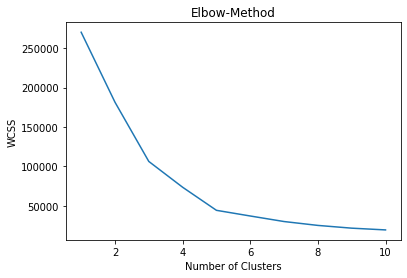

In [26]:
#We are using wcss method to find optimal no of cluster!!

from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("Elbow-Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


In [27]:
  kmeans = KMeans(n_clusters = 5,init='k-means++',random_state=42)
  y_kmeans = kmeans.fit_predict(X)

In [28]:
y_kmeans

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

## Visualizing the Clusters with centroids

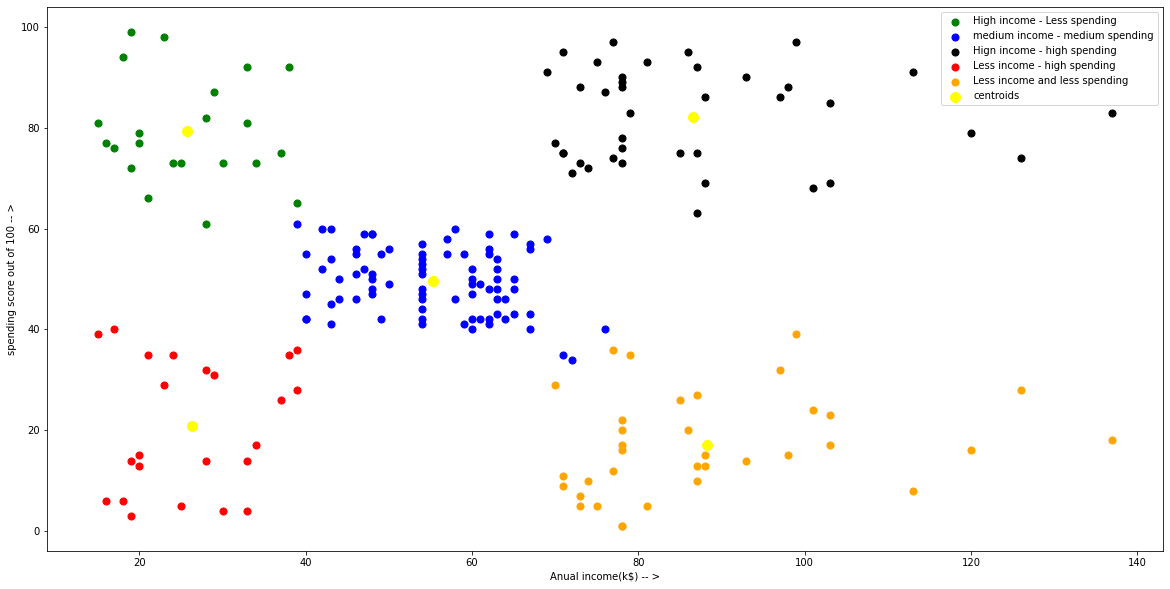

In [32]:
plt.figure(figsize = (20,10))
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1],s = 50, c = 'green', label = "High income - Less spending")
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1],s = 50, c = 'blue', label = "medium income - medium spending")
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1],s = 50, c = 'black', label = "Hign income - high spending")
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1],s = 50, c = 'red', label = "Less income - high spending")
plt.scatter(X[y_kmeans == 4,0],X[y_kmeans == 4,1],s = 50, c = 'orange', label = "Less income and less spending")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 100, c = "yellow", label = "centroids")
plt.xlabel("Anual income(k$) -- >")
plt.ylabel("spending score out of 100 -- >")
plt.legend()
plt.show()

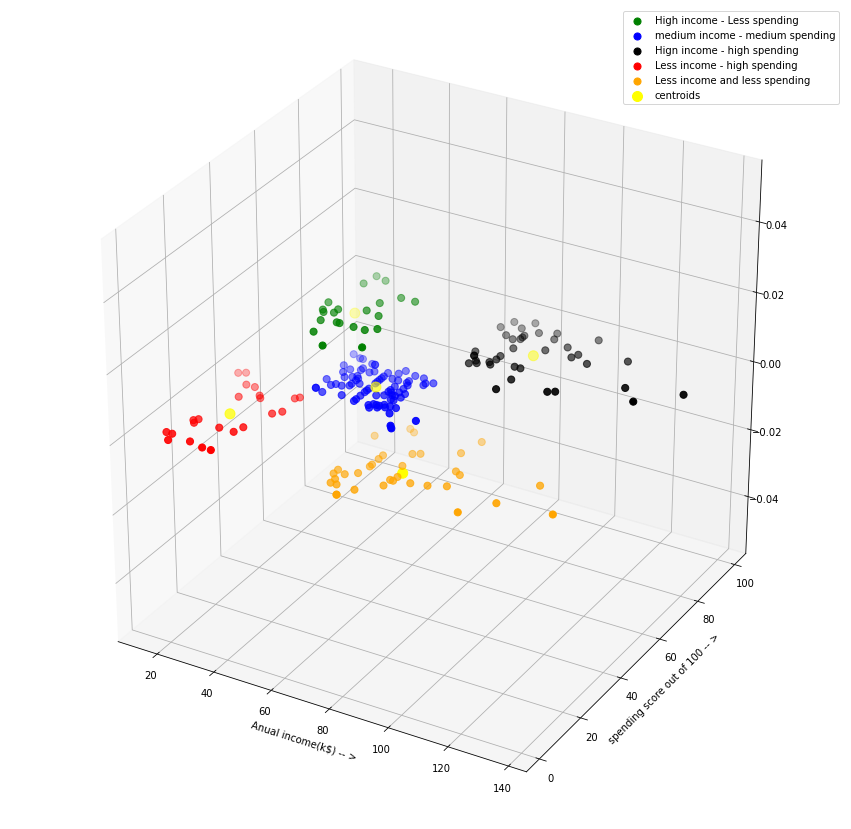

In [33]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1],s = 50, c = 'green', label = "High income - Less spending")
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1],s = 50, c = 'blue', label = "medium income - medium spending")
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1],s = 50, c = 'black', label = "Hign income - high spending")
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1],s = 50, c = 'red', label = "Less income - high spending")
plt.scatter(X[y_kmeans == 4,0],X[y_kmeans == 4,1],s = 50, c = 'orange', label = "Less income and less spending")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 100, c = "yellow", label = "centroids")
plt.xlabel("Anual income(k$) -- >")
plt.ylabel("spending score out of 100 -- >")
plt.legend()
plt.show()

In [45]:
##3d interactive plot using Plotly

Scene = dict(xaxis = dict(title  = 'Spending Score--->'),yaxis = dict(title  = 'Annual Income-->'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = kmeans.labels_
trace = go.Scatter3d(x=X[:, 0], y=X[:, 1],mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()